Displaying  FDDB images with ground truth faces
----
Clément Domps
Yidi Zhu

In [1]:
import cv2 as cv
import numpy as np
import math
import matplotlib.pyplot as plt

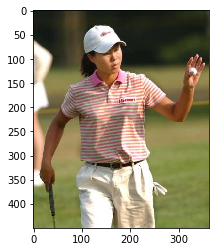

In [2]:
img_dir="./2002/07/19/big/img_130.jpg"
plt.imshow(plt.imread(img_dir))

In [3]:
# function to parse the file and save the data corresponding to the location of the faces in the images
def display_faces(filename):
    file = open(filename,"r+")
    image_dict={}
    while True:
        image = file.readline().rstrip()
        if not image:
            break
        number = int(file.readline())
        image_dict[image]=[]
        for i in range(number):
            ellipse = [float(x) for x in file.readline().split()]
            maximum = int(max(ellipse[0], ellipse[1]))
            minimum = int(min(ellipse[0], ellipse[1]))
            angle = int(math.degrees(ellipse[2]))
            x,y = int(ellipse[3]),int(ellipse[4])
            face_ellipse =((maximum,minimum),angle,(x,y))
            image_dict[image].append(face_ellipse)
    file.close()
    return image_dict


annot = display_faces("./FDDB-folds/FDDB-fold-01-ellipseList.txt")

In [4]:
# we display the image number 3
name = list(annot.keys())[11]
image = cv.imread("./"+name+".jpg")

# drawing parameters
startAngle = 0
endAngle = 360
color = (0, 0, 255) 
thickness = 5

# draw all the faces onto the image
for ellipse in annot[name]:
    image = cv.ellipse(image,ellipse[2],ellipse[0],ellipse[1],startAngle,endAngle,color,thickness)
# display the image with the location of the faces
cv.imshow('image',image)
cv.waitKey(0)

-1